In [1]:
import os
import pandas as pd
# Load the autoreload extension
%load_ext autoreload

# Set autoreload to automatically reload all modules before execution
%autoreload 2
%reload_ext autoreload

In [ ]:
os.chdir('C:/Users/basleal/Desktop/tutorial/kaim-week-3/kaim-week-3')

In [12]:
data=pd.read_csv('/content/drive/MyDrive/dataset/cleanedMachineLearningRating_v3.csv',parse_dates=['TransactionMonth'])
data.head()

<ipython-input-12-1b2ba397a77c>:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/content/drive/MyDrive/dataset/cleanedMachineLearningRating_v3.csv',parse_dates=['TransactionMonth'])


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,MaritalStatus,Gender,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,Not specified,Male,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,Not specified,Male,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,Not specified,Male,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,Not specified,Male,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,Not specified,Male,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [6]:
data.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode',
       'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType',
       'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity',
       'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate',
       'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice',
       'CapitalOutstanding', 'NewVehicle', 'SumInsured', 'TermFrequency',
       'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory',
       'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass',
       'StatutoryRiskType', 'TotalPremium', 'TotalClaims'],
      dtype='object')

In [7]:
data.drop(columns = ['CoverGroup','Section','Title','Language','StatutoryRiskType','StatutoryClass','ItemType','IsVATRegistered'],inplace=True)

In [19]:
#from scripts.statistical_modeling import preprocess
def preprocess(data):
    categorical=[]
    numerical=[]
    for column in data.columns:
        if data[column].dtype == 'object':
            categorical.append(column)
        elif data[column].dtype in ['int64','float64']:
            numerical.append(column)
    return numerical,categorical
numerical,categorical=preprocess(data)
data[categorical].columns

Index(['Citizenship', 'LegalType', 'Title', 'Language', 'MaritalStatus',
       'Gender', 'Country', 'Province', 'MainCrestaZone', 'SubCrestaZone',
       'ItemType', 'VehicleType', 'make', 'Model', 'bodytype',
       'AlarmImmobiliser', 'TrackingDevice', 'NewVehicle', 'TermFrequency',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType'],
      dtype='object')

In [9]:
data[categorical].head()

,Citizenship,LegalType,MaritalStatus,Gender,Country,Province,MainCrestaZone,SubCrestaZone,VehicleType,make,...,VehicleIntroDate,AlarmImmobiliser,TrackingDevice,CapitalOutstanding,NewVehicle,TermFrequency,ExcessSelected,CoverCategory,CoverType,Product
0,,Close Corporation,Not specified,Male,South Africa,Gauteng,Rand East,Rand East,Passenger Vehicle,MERCEDES-BENZ,...,6/2002,Yes,No,119300,More than 6 months,Monthly,Mobility - Windscreen,Windscreen,Windscreen,Mobility Metered Taxis: Monthly
1,,Close Corporation,Not specified,Male,South Africa,Gauteng,Rand East,Rand East,Passenger Vehicle,MERCEDES-BENZ,...,6/2002,Yes,No,119300,More than 6 months,Monthly,Mobility - Windscreen,Windscreen,Windscreen,Mobility Metered Taxis: Monthly
2,,Close Corporation,Not specified,Male,South Africa,Gauteng,Rand East,Rand East,Passenger Vehicle,MERCEDES-BENZ,...,6/2002,Yes,No,119300,More than 6 months,Monthly,Mobility - Windscreen,Windscreen,Windscreen,Mobility Metered Taxis: Monthly
3,,Close Corporation,Not specified,Male,South Africa,Gauteng,Rand East,Rand East,Passenger Vehicle,MERCEDES-BENZ,...,6/2002,Yes,No,119300,More than 6 months,Monthly,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Mobility Metered Taxis: Monthly
4,,Close Corporation,Not specified,Male,South Africa,Gauteng,Rand East,Rand East,Passenger Vehicle,MERCEDES-BENZ,...,6/2002,Yes,No,119300,More than 6 months,Monthly,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Mobility Metered Taxis: Monthly


In [14]:
import numpy as np
data['Margin'] = data['TotalPremium'] - data['TotalClaims']
#data['Claim_to_Premium_Ratio'] = data['TotalClaims'] / (data['TotalPremium'] + 1)  # Avoid division by zero
data['Log_Premium'] = np.log1p(data['TotalPremium'])
data['Log_Total_Claim'] = np.log1p(data['TotalClaims'])

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
data.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'IsVATRegistered', 'Citizenship',
       'LegalType', 'MaritalStatus', 'Gender', 'Province', 'PostalCode',
       'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType',
       'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity',
       'kilowatts', 'bodytype', 'NumberOfDoors', 'CustomValueEstimate',
       'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding',
       'NewVehicle', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'Product',
       'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims',
       'Margin', 'Claim_to_Premium_Ratio', 'Log_Premium', 'Log_Total_Claim',
       'TransactionYear', 'TransactionMonthNum', 'TransactionQuarter'],
      dtype='object')

In [15]:
data['TransactionYear'] = data['TransactionMonth'].dt.year
data['TransactionMonthNum'] = data['TransactionMonth'].dt.month

In [16]:
data['DaysSinceFirstTransaction'] = (data['TransactionMonth'] - data['TransactionMonth'].min()).dt.days

In [17]:
data['CapitalOutstanding'] = data['CapitalOutstanding'].str.replace(',', '.').astype(float)

In [18]:
data.drop(columns=['VehicleIntroDate'], inplace=True)
data.drop(columns=['TransactionMonth'], inplace=True)

In [ ]:
print(data.select_dtypes(include=['object']).columns)


Index(['LegalType', 'SubCrestaZone', 'VehicleType', 'bodytype'], dtype='object')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Columns: 164 entries, UnderwrittenCoverID to DaysSinceFirstTransaction
dtypes: datetime64[ns](1), float64(142), int32(2), int64(17), object(2)
memory usage: 1.2+ GB


In [ ]:
data.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'Citizenship', 'LegalType',
       'MaritalStatus', 'Gender', 'Province', 'PostalCode', 'MainCrestaZone',
       'SubCrestaZone', 'mmcode', 'VehicleType', 'RegistrationYear', 'make',
       'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype',
       'NumberOfDoors', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'SumInsured', 'TermFrequency',
       'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory',
       'CoverType', 'Product', 'TotalPremium', 'TotalClaims', 'Margin',
       'Claim_to_Premium_Ratio', 'Log_Premium', 'Log_Total_Claim',
       'TransactionYear', 'TransactionMonthNum', 'DaysSinceFirstTransaction'],
      dtype='object')

In [20]:
import xgboost as xgb

X=data.drop(columns=['TotalClaims','Log_Total_Claim'])
y = data['TotalClaims']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
# Convert categorical columns to "category" dtype
X_train[categorical] = X_train[categorical].astype("category")
X_test[categorical] = X_test[categorical].astype("category")

# Train XGBoost Model with Categorical + Numerical Features
xgb_model = xgb.XGBRegressor(enable_categorical=True)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [21]:
X_train.to_csv('X_train_xg.csv',index=False)
X_test.to_csv('X_test_xg.csv',index=False)
y_train.to_csv('y_train_xg.csv',index=False)
y_test.to_csv('y_test_xg.csv',index=False)

In [ ]:
X_train.shape

(700068, 38)

In [22]:
y_p=xgb_model.predict(X_test)
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse=mean_squared_error(y_test,y_p)
mae=mean_absolute_error(y_test,y_p)
r2=r2_score(y_test,y_p)
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2: {r2:.2f}')

MSE: 3549272.91
MAE: 67.39
R2: 0.34


In [ ]:
import joblib
joblib.dump(xgb_model,'xgb_model_2.jotlib')

NameError: name 'xgb_model' is not defined

In [ ]:
load_model=joblib.load('/content/xgb_model_2.jotlib')

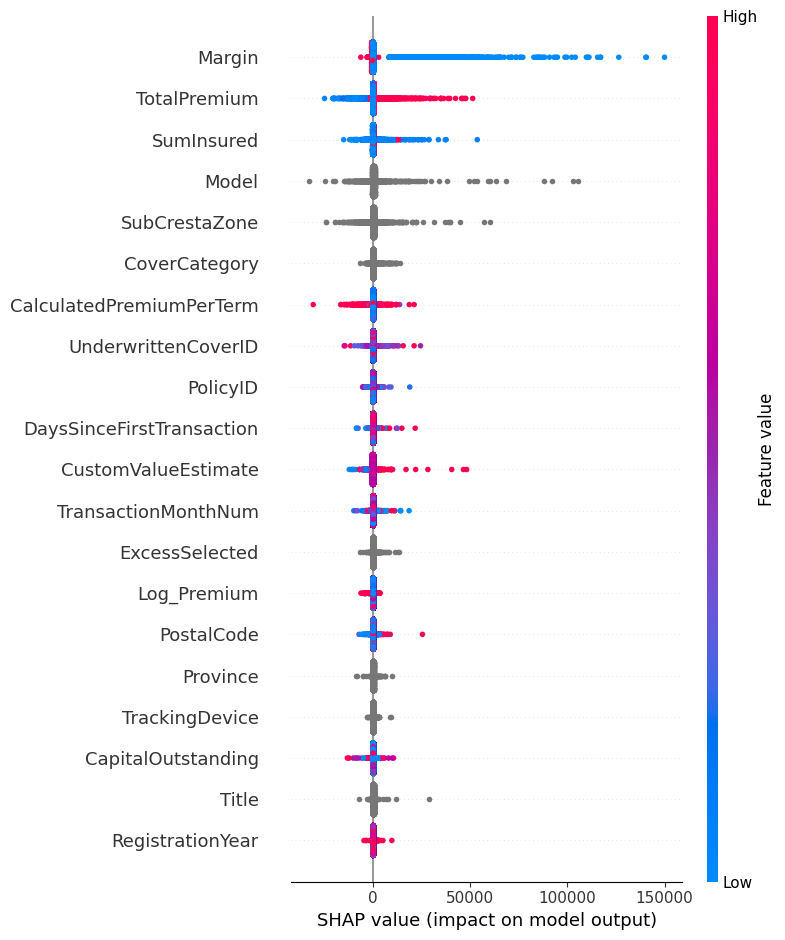

In [ ]:
import shap
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_train, check_additivity=False)
shap.summary_plot(shap_values, X_train)

Margin, Total Premium, SumInsured ,Model ,SubCrestaZone, CoverCategory,Calculated, Premium, PerTerm ,UnderwrittenCoverID
PolicyID
DaysSince First Transaction
CustomValueEstimate
TransactionMonthNum
ExcessSelected
Log_Premium
PostalCode
Province
Tracking Device
Capital Outstanding
Title
Registration Year

In [ ]:
'MaritalStatus', 'ExcessSelected','make', 'Model','Province','Gender','AlarmImmobiliser', 'TrackingDevice', 'TermFrequency', 'Product','Citizenship'

In [ ]:
import lime
import lime.lime_tabular


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=02cb644e39b791dd36e056bc23e49824775f24c2e8ec112c6c98ba9badbaad33
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
loaded_model = joblib.load("/content/xgb_model_2.jotlib")

**Strongest Features Affecting Total Claim**
Margin (Strongest Effect)

**The most impactful feature.**
Low Margin (blue) tends to decrease the total claim.
High Margin (red) tends to increase the total claim.
**Interpretation**: If a policy has a high profit margin for the insurer, it tends to be associated with higher claims.
Total Premium

**The second most important feature.**
Higher premium (red) is correlated with higher total claims.
**Interpretation**: Policies with higher premiums tend to cover more expensive risks, leading to larger claims.
Sum Insured

**High impact on total claims.**
Higher sum insured (red) leads to higher total claims.
**Interpretation**: The more an asset is insured for, the more an insurance company may have to pay in claims.
Calculated Premium Per Term Shows a noticeable impact.
Higher calculated premium (red) correlates with higher total claims.
**Interpretation**: The calculated risk (reflected in the premium per term) directly affects claim amounts.
Log_Premium

**Another significant feature.**
Higher log-transformed premium (red) corresponds to higher claims.
**Interpretation**: Premium adjustments based on risk level influence claim payouts.
What This Means
The financial aspects of the policy (Margin, Total Premium, Sum Insured, Log_Premium) play the largest roles in determining claim amounts.
Higher premiums and insured amounts generally correspond to higher claim payouts, which makes sense because expensive policies cover higher-value risks.
Margin’s strong effect suggests that profitability for the insurer is linked with claim behavior—possibly indicating a relationship between risk assessment and pricing strategy.
Categorical features (e.g., CoverCategory, Model) have some influence but are not the most dominant.

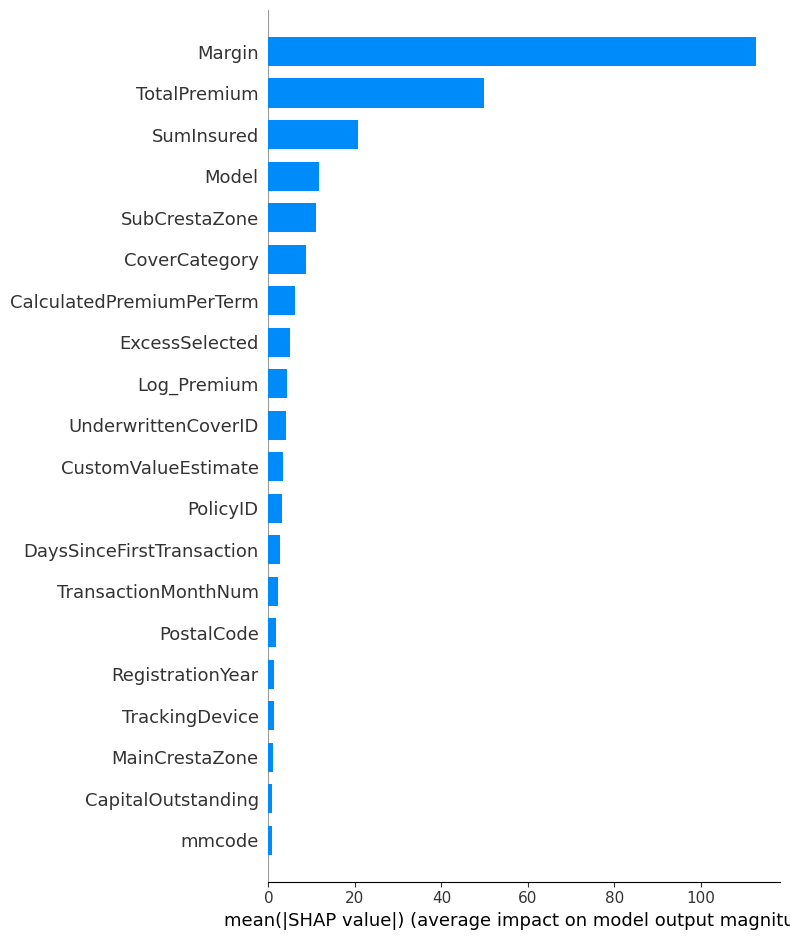

In [ ]:
# Visualize feature importance globally
shap.summary_plot(shap_values, X_test, plot_type="bar")